## Installations and Requirements

In [ ]:
!pip install opencv-python
!pip install matplotlib
!pip install numpy

# Imports

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

# Read Image

### Read image.jpg from the folder (using OpenCV)

In [6]:
image_bgr = cv2.imread('./image.jpg')

### Convert it to Gray (using OpenCV)

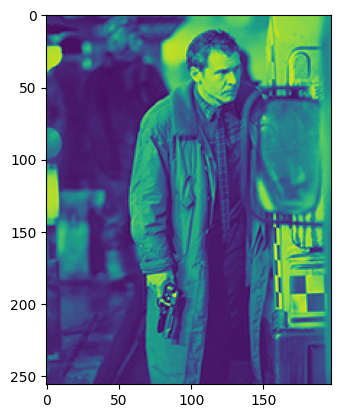

In [8]:
plt.imshow(image := cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY));

# Graph Representations

### Implement Graph Representation (From Scratch Without OpenCV)

In [9]:
def get_graph(image, connectivity=4):
    rows, cols = image.shape
    nodes = rows * cols
    edges = []

    def get_neighbors(row, col):
        neighbors = []

        if row > 0:
            neighbors.append((row - 1, col))  # Top
        if row < rows - 1:
            neighbors.append((row + 1, col))  # Bottom
        if col > 0:
            neighbors.append((row, col - 1))  # Left
        if col < cols - 1:
            neighbors.append((row, col + 1))  # Right

        if connectivity == 8:
            if row > 0 and col > 0:
                neighbors.append((row - 1, col - 1))  # Top-left
            if row > 0 and col < cols - 1:
                neighbors.append((row - 1, col + 1))  # Top-right
            if row < rows - 1 and col > 0:
                neighbors.append((row + 1, col - 1))  # Bottom-left
            if row < rows - 1 and col < cols - 1:
                neighbors.append((row + 1, col + 1))  # Bottom-right

        return neighbors

    for row in range(rows):
        for col in range(cols):
            current_node = row * cols + col
            neighbors = get_neighbors(row, col)

            for neighbor_row, neighbor_col in neighbors:
                neighbor_node = neighbor_row * cols + neighbor_col
                edges.append((current_node, neighbor_node))

    return nodes, edges

In [10]:
get_graph(image)

(50432,
 [(0, 197),
  (0, 1),
  (1, 198),
  (1, 0),
  (1, 2),
  (2, 199),
  (2, 1),
  (2, 3),
  (3, 200),
  (3, 2),
  (3, 4),
  (4, 201),
  (4, 3),
  (4, 5),
  (5, 202),
  (5, 4),
  (5, 6),
  (6, 203),
  (6, 5),
  (6, 7),
  (7, 204),
  (7, 6),
  (7, 8),
  (8, 205),
  (8, 7),
  (8, 9),
  (9, 206),
  (9, 8),
  (9, 10),
  (10, 207),
  (10, 9),
  (10, 11),
  (11, 208),
  (11, 10),
  (11, 12),
  (12, 209),
  (12, 11),
  (12, 13),
  (13, 210),
  (13, 12),
  (13, 14),
  (14, 211),
  (14, 13),
  (14, 15),
  (15, 212),
  (15, 14),
  (15, 16),
  (16, 213),
  (16, 15),
  (16, 17),
  (17, 214),
  (17, 16),
  (17, 18),
  (18, 215),
  (18, 17),
  (18, 19),
  (19, 216),
  (19, 18),
  (19, 20),
  (20, 217),
  (20, 19),
  (20, 21),
  (21, 218),
  (21, 20),
  (21, 22),
  (22, 219),
  (22, 21),
  (22, 23),
  (23, 220),
  (23, 22),
  (23, 24),
  (24, 221),
  (24, 23),
  (24, 25),
  (25, 222),
  (25, 24),
  (25, 26),
  (26, 223),
  (26, 25),
  (26, 27),
  (27, 224),
  (27, 26),
  (27, 28),
  (28, 225),
  (

# Graph Operations

### Implement Image Graph Weights Assigment Based On Edges Using Information Described In Intelligent Scrissors Algorithm (Using OpenCV)

In [13]:
def calculate_edge_weights(image):
    # Calculate gradient magnitude using the Sobel operator
    gradient_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    # Normalize the gradient magnitude to [0, 1]
    gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 1, cv2.NORM_MINMAX)

    return gradient_magnitude

def display_edge_weights(image, edge_weights):
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(edge_weights, cmap='viridis')
    plt.title('Edge Weights')
    plt.axis('off')

    plt.show()

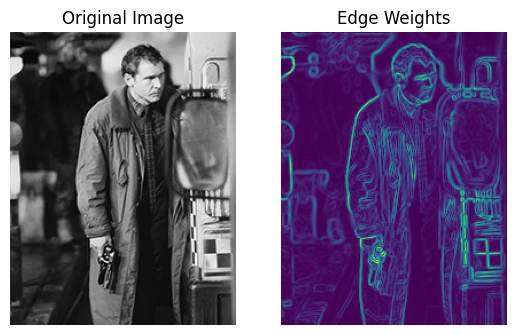

In [15]:
edge_weights = calculate_edge_weights(image)

# Display the original image and edge weights
display_edge_weights(image, edge_weights)

### Implement & Apply GrapCut (Using OpenCV)

In [49]:
def apply_grabcut(img):

    # Create a mask initialized with zeros
    mask = np.zeros(img.shape[:2], np.uint8)

    # Set the initial rectangle for foreground and background
    rect = (55, 10, 105, image.shape[1] - 10)
    # 20:190, 100:130

    # Initialize the background and foreground models
    bgd_model = np.zeros((1, 65), np.float64)
    fgd_model = np.zeros((1, 65), np.float64)

    # Apply GrabCut algorithm
    cv2.grabCut(img, mask, rect, bgd_model, fgd_model, 3, cv2.GC_INIT_WITH_RECT)

    # Modify the mask to create a binary mask for foreground and background
    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

    # Multiply the image with the binary mask to get the segmented result
    result = img * mask2[:, :, np.newaxis]

    # Display the original image and the segmented result
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title('Segmented Result')
    plt.axis('off')

    plt.show()

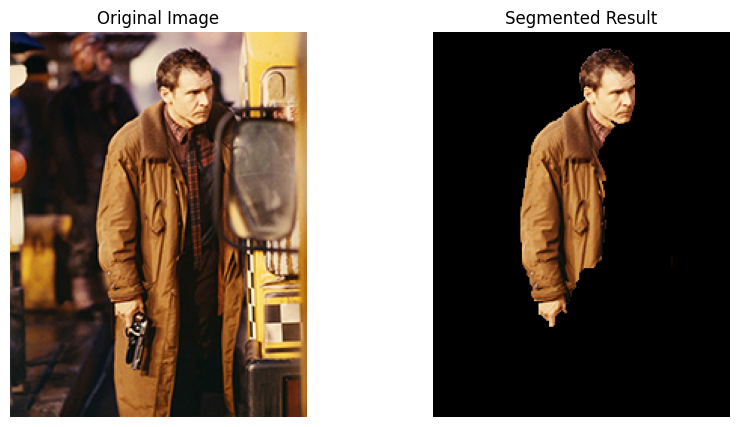

In [50]:
apply_grabcut(image_bgr)

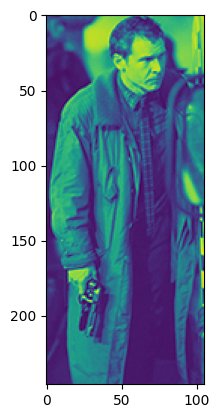

In [48]:
plt.imshow(image[10:, 55:160])